<a href="https://colab.research.google.com/github/jvpalhares/IA353-vonzuben/blob/main/PC1_Ativ1_LC_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook PC1_Ativ1**
## Regularized Linear Classifier for the MNIST database.
## Design from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** João Victor Palhares Barbosa


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist

# xp = xtrain
# xtp = xtest
# y = ytrain
# yt = ytest

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

Xa = Xa / 255.0
Xta = Xta / 255.0

X0 = np.ones((Xp.shape[0],1))
X = np.hstack((X0,Xa))
Xt0 = np.ones((Xtp.shape[0],1))
Xt = np.hstack((Xt0,Xta))

# x0 = xtrain
# x = xtrain + bias
# xt0 = xtest
# xt = xtest + bias

# dados já normalizados

print("Shape of X: ",  X.shape)
print("Shape of y: ",  y.shape)
print("Shape of Xt: ".ljust(10),  X.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 785)
Shape of y:  (60000,)
Shape of Xt:  (60000, 785)
Shape of yt:  (10000,)


In [ ]:
Xp.shape

(60000, 28, 28)

In [ ]:
# Visualizing a random data point
import plotly.express as px

#ind = np.random.randint(60000)
#print('Data point: ', ind, '\n', 'Label: ', y[ind])
fig = px.imshow(255-Xp[0], binary_string=True, width=200, height=200)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()

In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [ ]:
X.shape[0]

60000

In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

X_training:          (42000, 785)
y_training:          (42000, 10)
X_validation:        (18000, 785)
y_validation:        (18000, 10)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_ 

In [ ]:
def get_w(X, y, c): 
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w


In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []
    
    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)
        
        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

**Células originais para a pergunta A:**

In [ ]:
c_values = [pow(2,d) for d in range(-10, 18, 2)]

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536


Best c value: 1024 
Performance of this value: 0.8583888888888889


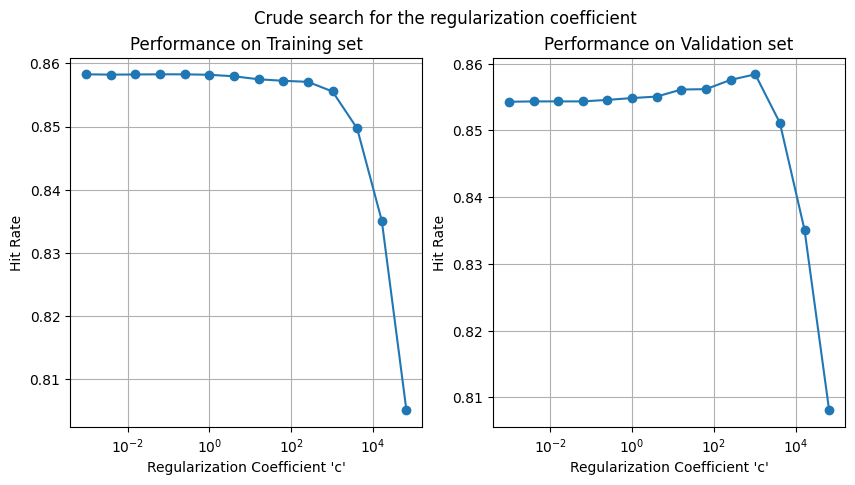

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))

**Resposta A:**

In [ ]:
c_values = [pow(2,d) for d in range(-50, 50, 2)]

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

8.881784197001252e-16
3.552713678800501e-15
1.4210854715202004e-14
5.684341886080802e-14
2.2737367544323206e-13
9.094947017729282e-13
3.637978807091713e-12
1.4551915228366852e-11
5.820766091346741e-11
2.3283064365386963e-10
9.313225746154785e-10
3.725290298461914e-09
1.4901161193847656e-08
5.960464477539063e-08
2.384185791015625e-07
9.5367431640625e-07
3.814697265625e-06
1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944
1099511627776
4398046511104
17592186044416
70368744177664
281474976710656


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

8.881784197001252e-16
3.552713678800501e-15
1.4210854715202004e-14
5.684341886080802e-14
2.2737367544323206e-13
9.094947017729282e-13
3.637978807091713e-12
1.4551915228366852e-11
5.820766091346741e-11
2.3283064365386963e-10
9.313225746154785e-10
3.725290298461914e-09
1.4901161193847656e-08
5.960464477539063e-08
2.384185791015625e-07
9.5367431640625e-07
3.814697265625e-06
1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944
1099511627776
4398046511104
17592186044416
70368744177664
281474976710656


Best c value: 1024 
Performance of this value: 0.8583888888888889


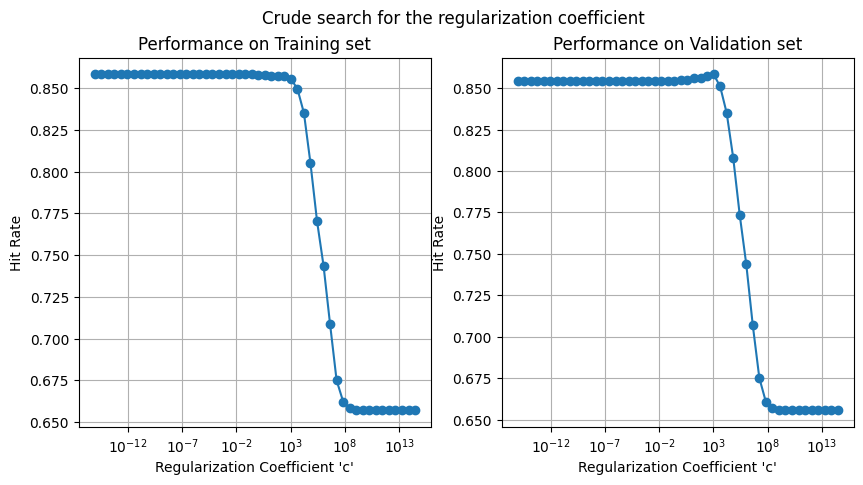

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))



O intervalo de busca está adequado. Aumentando de (-10, 18, 2), para (-50, 50, 2) é possível definir que o melhor C value continua o mesmo, sendo 1024 para ambos os casos, com uma performance de 0.858.

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(X_training, y_training, fine_c_values)

256.0
640.0
1024.0
1408.0
1792.0
2176.0
2560.0
2944.0
3328.0
3712.0
4096.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(X_validation, y_validation, fine_c_values, Ws_fine)

256.0
640.0
1024.0
1408.0
1792.0
2176.0
2560.0
2944.0
3328.0
3712.0
4096.0


Best c value: 1024.0 
Performance of this value: 0.8583888888888889


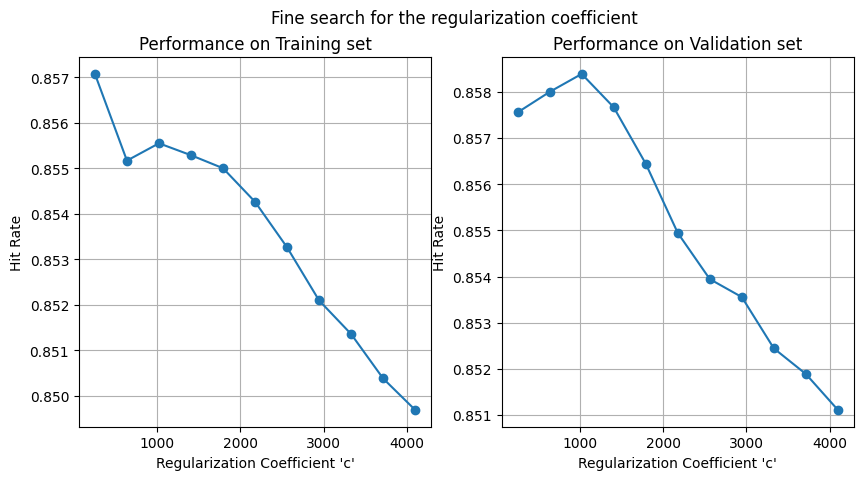

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
W = get_w(X, yy, best_c)
print(W.shape)

(785, 10)


In [ ]:
yt_estimate = np.matmul(Xt,W)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.8642
[[ 940    0   18    5    1   21   15    5   13   19]
 [   0 1104   64   16   23   16   11   44   55   14]
 [   1    2  831   25    6    5    5   17    9    3]
 [   2    2   20  886    0   88    0    7   31   13]
 [   1    2   14    5  883   24   16   17   26   66]
 [   9    1    0   14    2  632   16    0   27    2]
 [  18    5   23    9   10   25  889    1   19    1]
 [   1    1   24   23    1   19    0  894   14   63]
 [   7   18   34   17   10   42    6    0  761    6]
 [   1    0    4   10   46   20    0   43   19  822]]


**Resposta B:** As duas classes mais desafiadoras foram os números 5 e 8. O critério utilizado foi a matriz de confusão das classes.

#### **Visualization of the 10 vectors of weights W, without the bias.**



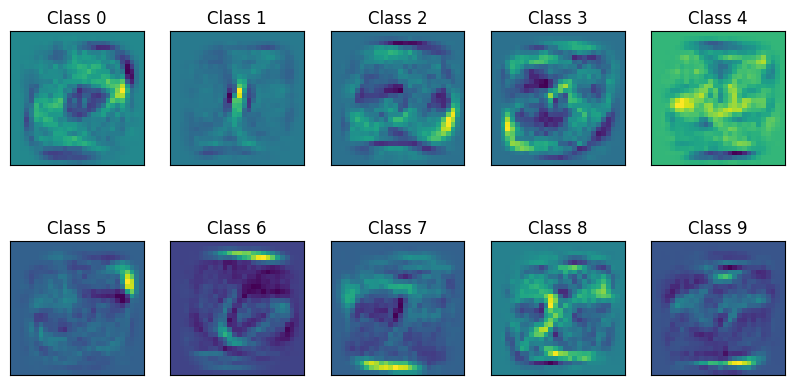

In [ ]:
# Only for the MNIST dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

#### **To improve the visualization of the 10 vectors of weights W, the use of a divergent color map is indicated: the average value of the color map is a neutral color and the extreme values represent different colors. Using a divergent color map and a bilinear interpolation scheme (to facilitate the visualization of low-resolution images), the result of the visualization of the 10 vectors of weights W is illustrated in the following images.**

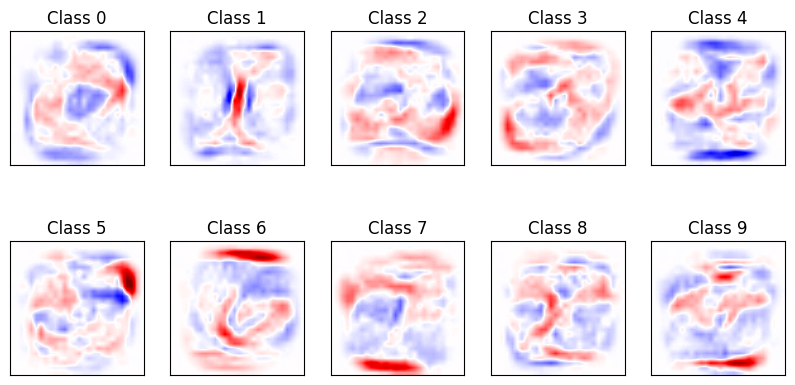

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

**Resposta da C:** O objetivo do classificador linear é ter um bom desempenho ao trabalhar com a regularização. Na imagem acima é possível identificar os pesos nas imagens, ou seja, onde o modelo caracteriza as formas dos números.

#### **Performance of the average 10 vectors of weights (here no bias is considered)**

In [ ]:
W1 = np.zeros((784, 10))
for i in range(10):
  aux = np.mean(Xp[y==i], axis=0)
  aux = aux.reshape(784)/255
  aux = aux-np.mean(aux)
  W1[:,i] = aux/np.sqrt(np.sum(np.square(aux)))
yt_estimate = np.matmul(Xta,W1)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.8208
[[ 902    0   27    6    4   27   29    8    7   16]
 [   0 1074   51    5   10   37   14   51   21   17]
 [   6    9  776   25    3    9   16   26   11    6]
 [   3    4   43  851    0  137    1    0   91   12]
 [   0    0   27    1  793   20   18   16   12   80]
 [  33    4    0   28    1  564   22    0   29   11]
 [  25    4   31    8   24   29  850    1   17    3]
 [   1    0   15   14    1   11    0  849   10   29]
 [  10   40   56   52   19   34    8   22  738   24]
 [   0    0    6   20  127   24    0   55   38  811]]


#### **Visualization of the average 10 vectors of weights**

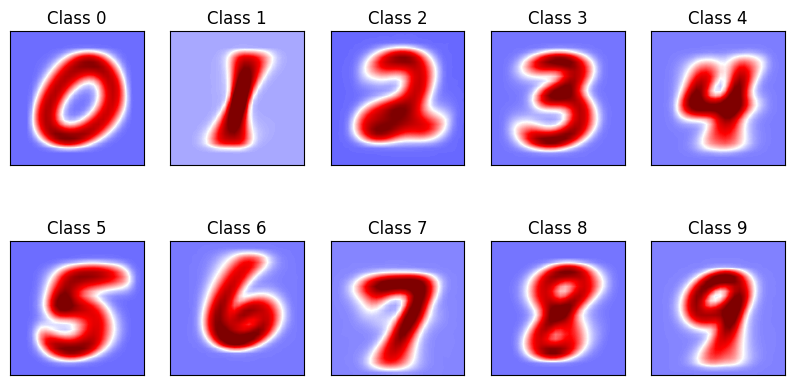

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W1).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W1[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

**Resposta da D:** O classificador liner não irá produzir o máximo desempenho pois ocorre uma média dos pesos em cada classe. Ou seja, não irá generalizar bem.

Image no. 11


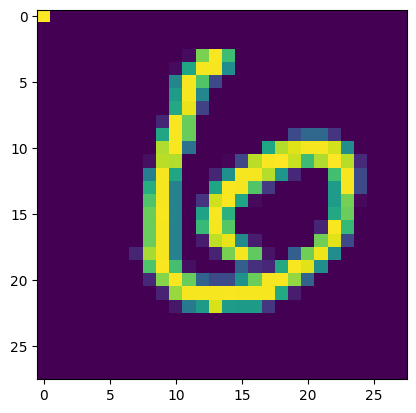

Real: 6
Predicted: 4
Rank of the correct answer: 6
Probabilities: [ 0.2344035   0.16069176  0.14971468  0.06913703  0.26389102 -0.17400486
  0.10095953 -0.07553308  0.17141296  0.05181571] 

Image no. 33


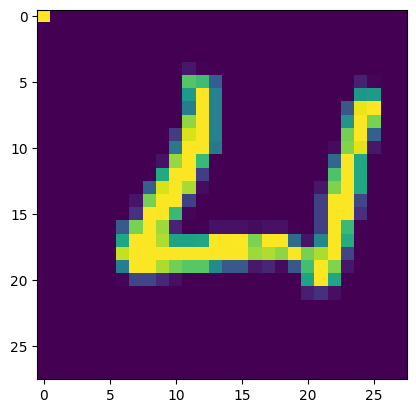

Real: 4
Predicted: 0
Rank of the correct answer: 4
Probabilities: [ 0.35845059 -0.08455628  0.1812747  -0.29922051  0.20366375  0.33781978
  0.22552617 -0.05079443  0.07592739 -0.04010936] 

Image no. 38


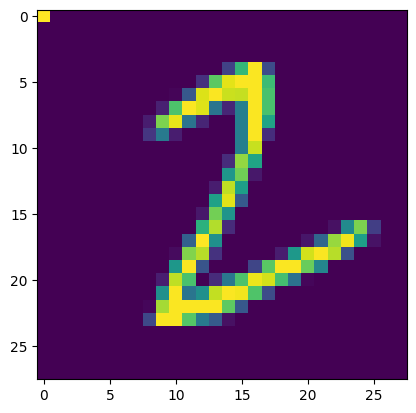

Real: 2
Predicted: 1
Rank of the correct answer: 5
Probabilities: [ 0.17249691  0.31698624  0.16484865  0.26119602 -0.28318569  0.08757432
  0.20884283 -0.05102544  0.12704516 -0.09350222] 

Image no. 43


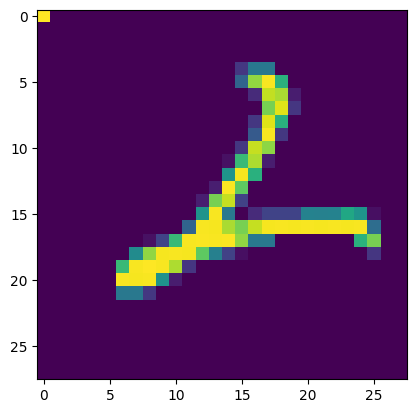

Real: 2
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.03469327  0.33227731  0.27943572  0.05419701  0.18465454  0.03928012
 -0.01111523 -0.04575413  0.13201297 -0.03458729] 

Image no. 45


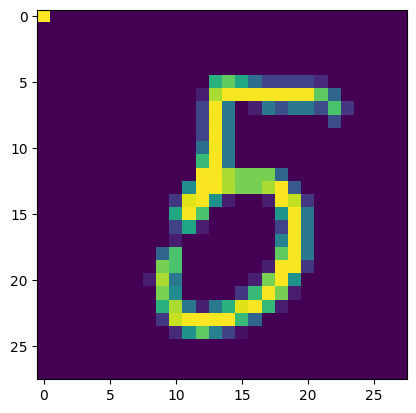

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.08727379 -0.12418142 -0.06194667  0.38226942  0.05653947  0.33789059
  0.17149562 -0.10338319  0.18624663 -0.01125874] 

Image no. 46


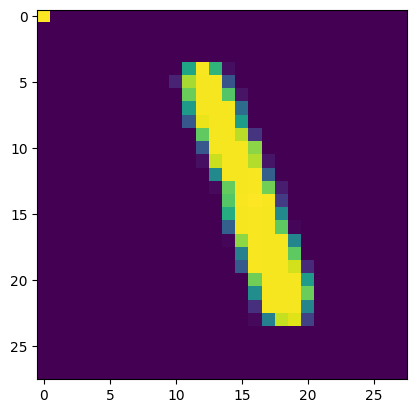

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [-0.27639744  0.31333585  0.14601131  0.33705365  0.07726481  0.19363085
  0.06894875  0.05522271 -0.00283716  0.07039978] 

Image no. 63


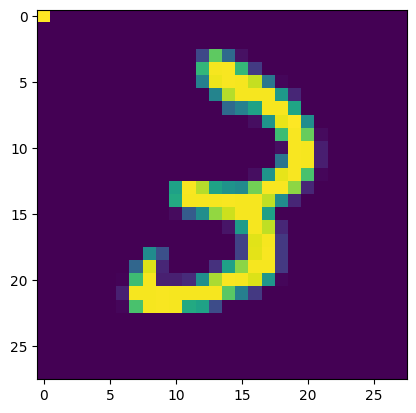

Real: 3
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.05063259  0.04588164  0.39904917  0.18717733  0.04060352 -0.01082341
 -0.02855646 -0.11580484  0.11012242  0.2805541 ] 

Image no. 66


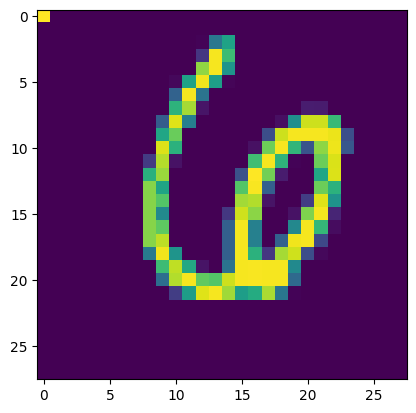

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [ 0.2156459   0.26985722  0.12385209  0.12443726  0.21578575 -0.09304025
  0.20129218  0.13814806 -0.08316641 -0.14394845] 

Image no. 77


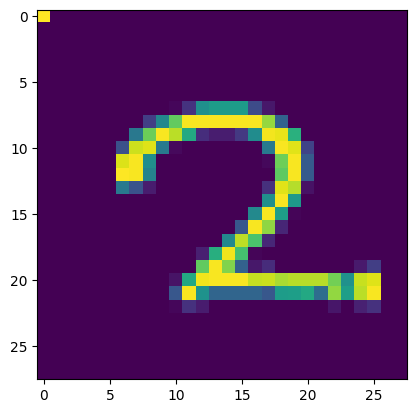

Real: 2
Predicted: 7
Rank of the correct answer: 2
Probabilities: [-0.0166231   0.09584678  0.39196455 -0.23724626  0.12517182  0.11163619
  0.07069253  0.41286161 -0.11696029  0.07467405] 

Image no. 80


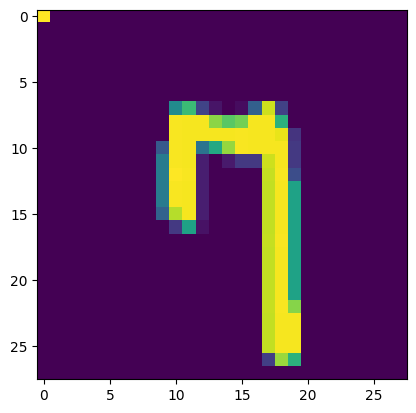

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10781509 -0.13303982 -0.01190414  0.06044388  0.10069472  0.10019941
  0.00430467  0.44161806 -0.19434251  0.50942149] 

Image no. 92


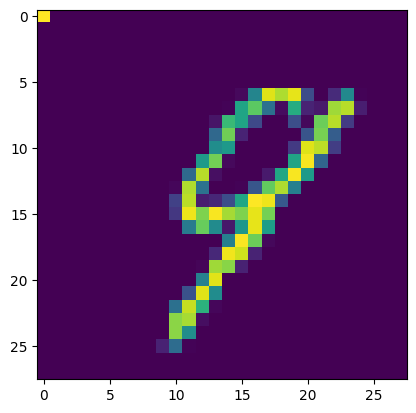

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.01491333  0.09968299  0.07817748 -0.02782986  0.25570433  0.05877023
  0.04344258  0.105886    0.085185    0.18575543] 

Image no. 97


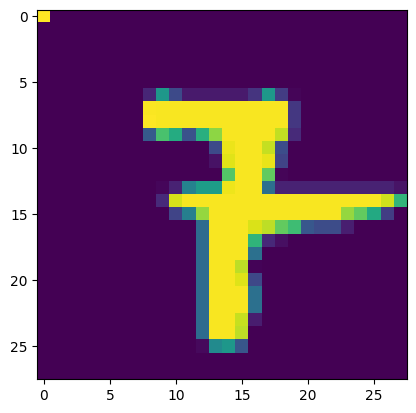

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.10859556  0.42963549 -0.15049236  0.20338289  0.14273784  0.00367364
  0.22254243  0.36102859 -0.01711557 -0.00275989] 

Image no. 111


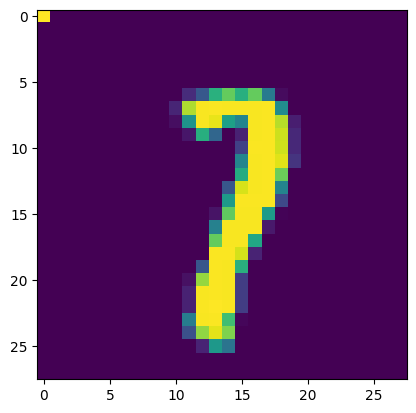

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.05950157  0.51291562  0.08376928  0.15744238 -0.0903743  -0.01337797
 -0.03162151  0.22523586  0.02893545  0.18489858] 

Image no. 124


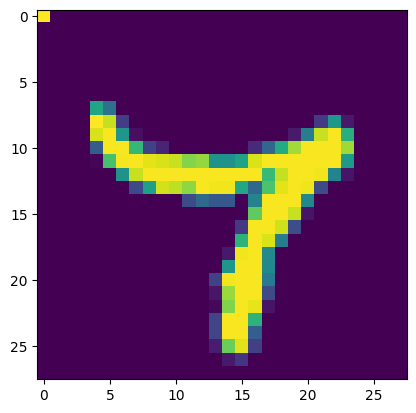

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.2234444   0.00794311 -0.24002489  0.16710828  0.38147653 -0.06748357
  0.0715589   0.3427552   0.27493831  0.27106622] 

Image no. 149


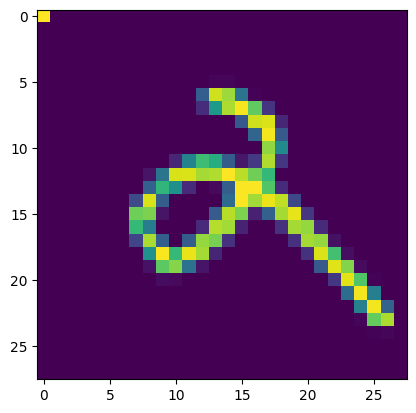

Real: 2
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.01405083  0.26406973  0.09704728  0.04699957  0.20472764  0.05430158
  0.03932891 -0.14749582  0.09218502  0.26240422] 

Image no. 167


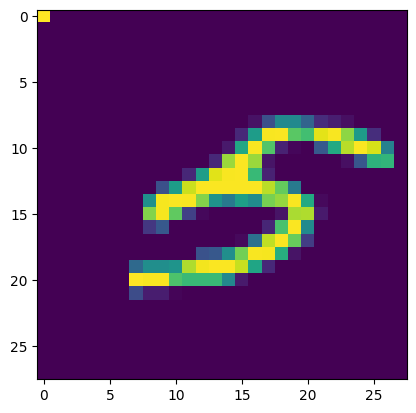

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.03666892  0.21142097  0.02565187  0.2875813   0.21562212  0.24789407
  0.00541988 -0.01713232 -0.02738404 -0.05335162] 

Image no. 187


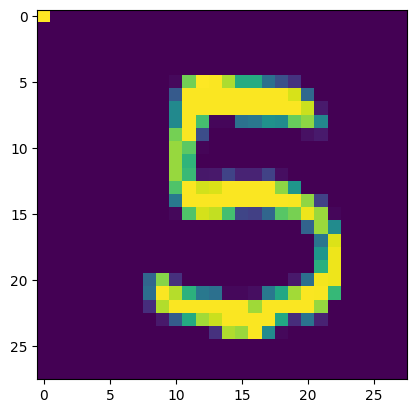

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.11333781 -0.04591545  0.11541755  0.38171485 -0.02827081  0.36768551
 -0.0959494  -0.20967416  0.17029475  0.19306254] 

Image no. 195


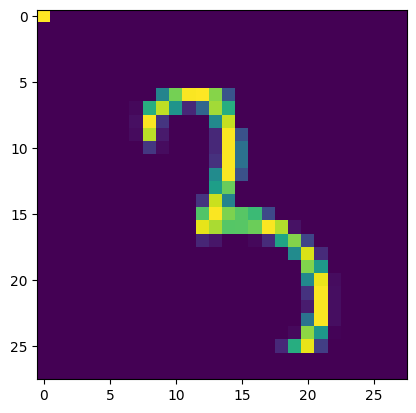

Real: 3
Predicted: 5
Rank of the correct answer: 3
Probabilities: [-0.12085922  0.00443375  0.07694146  0.13435959  0.08028235  0.21386106
  0.07809296  0.06363015  0.12357257  0.18208439] 



In [ ]:
def find_pos(item, lst): 
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z] 
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(Xt,W)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")

**Resposta da E:** A última célula do notebook é uma demonstração dos erros de predição do classificador. Pegamos de exemplo a última inferência (Real: 3, Predicted: 5), há um rank de probabilidades, sendo os números com a maior probabilidade até a menor probabilidade: 5, 9, 3, 8, 4, 6, 2, 7, 1, 0. É notório que a confusão entre os valores 5, 9, 3 e 8 é alta, ou seja, a taxa de erro para essa análise é alta.